In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset

In [2]:
im_shape = (250,250)

TRAINING_DIR = 'dataset/test'
TEST_DIR = 'dataset/train'

seed = 10

BATCH_SIZE = 16

In [3]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [4]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [5]:
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 24 images belonging to 6 classes.
Found 6 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


### Showing some examples

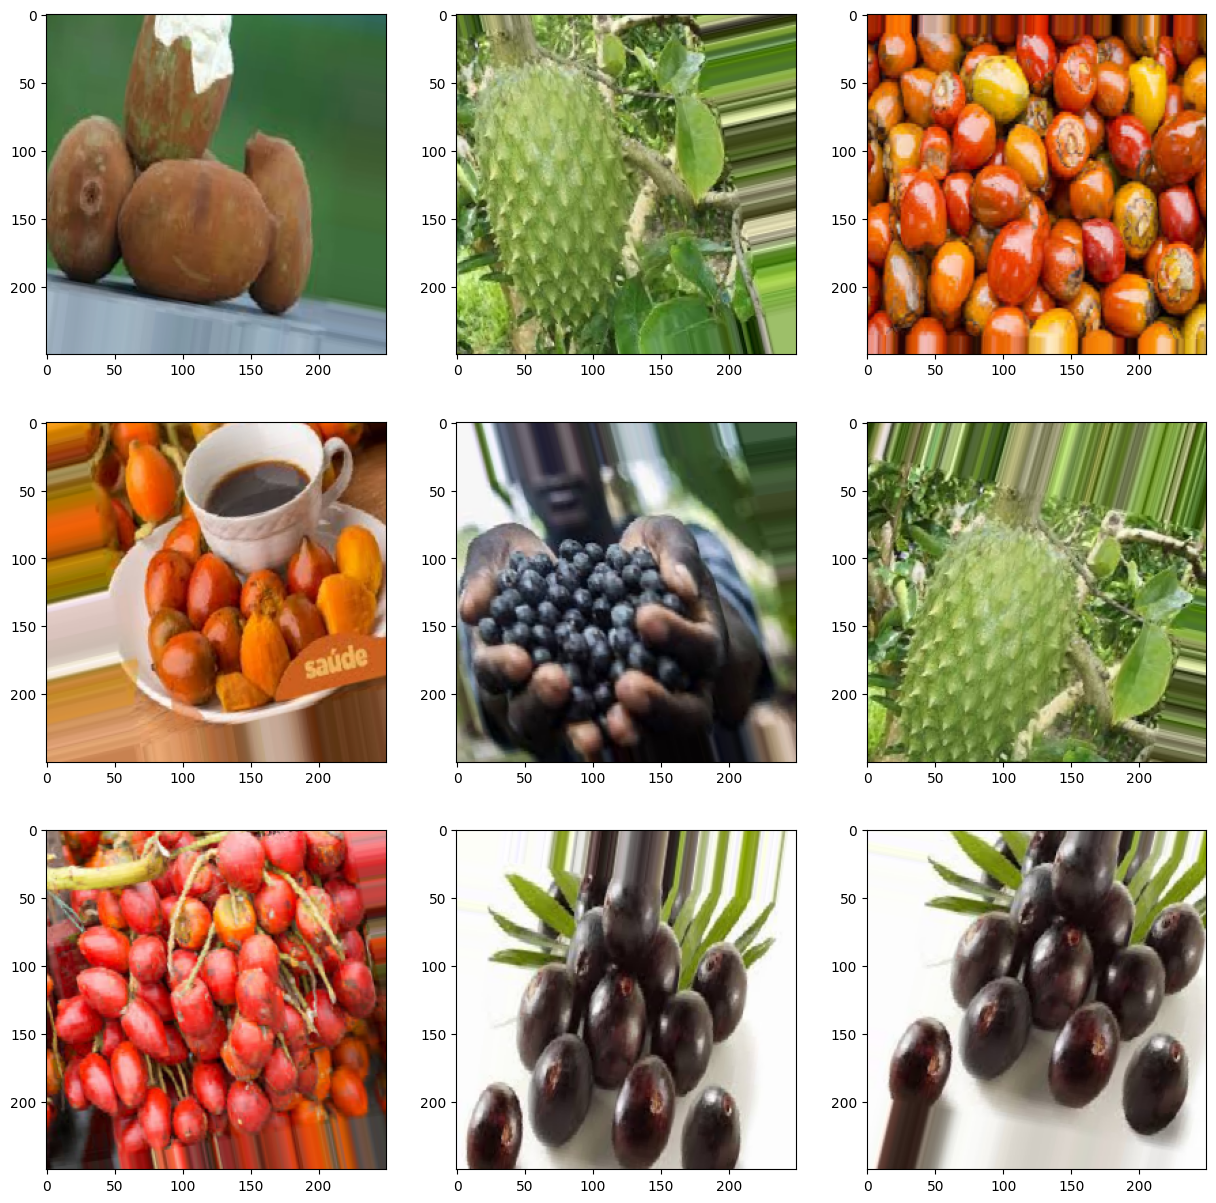

In [6]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = next(train_generator)[0] * 255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

## Creating a simple CNN Model

In [ ]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [8]:
epochs = 70

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.keras',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
]


history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/70


/Users/koc/Desktop/resit_tasdemir/venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3750 - loss: 1.7680
Epoch 1: val_loss improved from inf to 78.10926, saving model to model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3750 - loss: 1.7680 - val_accuracy: 0.1667 - val_loss: 78.1093
Epoch 2/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 742ms/step - accuracy: 0.0000e+00 - loss: 80.7919
Epoch 2: val_loss improved from 78.10926 to 10.12777, saving model to model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 80.7919 - val_accuracy: 0.1667 - val_loss: 10.1278
Epoch 3/70

Epoch 3: val_loss did not improve from 10.12777
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1667 - val_loss: 10.1278
Epoch 4/70


2024-05-01 21:32:23.619613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Applications/Xcode.app/Contents/Developer/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1250 - loss: 14.1122
Epoch 4: val_loss did not improve from 10.12777
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 14.1122 - val_accuracy: 0.1667 - val_loss: 25.0204
Epoch 5/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 839ms/step - accuracy: 0.3750 - loss: 14.7206
Epoch 5: val_loss did not improve from 10.12777
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step - accuracy: 0.3750 - loss: 14.7206 - val_accuracy: 0.1667 - val_loss: 15.6547
Epoch 6/70

Epoch 6: val_loss did not improve from 10.12777
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1667 - val_loss: 15.6547
Epoch 7/70


2024-05-01 21:32:26.215132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1250 - loss: 21.0460
Epoch 7: val_loss did not improve from 10.12777
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 21.0460 - val_accuracy: 0.3333 - val_loss: 15.0129
Epoch 8/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.1250 - loss: 12.0744
Epoch 8: val_loss improved from 10.12777 to 9.04963, saving model to model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1250 - loss: 12.0744 - val_accuracy: 0.3333 - val_loss: 9.0496
Epoch 9/70

Epoch 9: val_loss did not improve from 9.04963
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 9.0496
Epoch 10/70


2024-05-01 21:32:30.343699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3750 - loss: 11.3761
Epoch 10: val_loss improved from 9.04963 to 5.36721, saving model to model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3750 - loss: 11.3761 - val_accuracy: 0.3333 - val_loss: 5.3672
Epoch 11/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 671ms/step - accuracy: 0.5000 - loss: 5.2896
Epoch 11: val_loss did not improve from 5.36721
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step - accuracy: 0.5000 - loss: 5.2896 - val_accuracy: 0.3333 - val_loss: 6.4453
Epoch 12/70

Epoch 12: val_loss did not improve from 5.36721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 6.4453
Epoch 13/70


2024-05-01 21:32:34.089996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3125 - loss: 4.8706
Epoch 13: val_loss did not improve from 5.36721
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3125 - loss: 4.8706 - val_accuracy: 0.3333 - val_loss: 6.3602
Epoch 14/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.0000e+00 - loss: 7.4922
Epoch 14: val_loss improved from 5.36721 to 4.16713, saving model to model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 7.4922 - val_accuracy: 0.3333 - val_loss: 4.1671
Epoch 15/70

Epoch 15: val_loss did not improve from 4.16713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 4.1671
Epoch 16/70


2024-05-01 21:32:38.153270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3750 - loss: 3.4769
Epoch 16: val_loss improved from 4.16713 to 2.39667, saving model to model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3750 - loss: 3.4769 - val_accuracy: 0.3333 - val_loss: 2.3967
Epoch 17/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 648ms/step - accuracy: 0.3750 - loss: 3.7508
Epoch 17: val_loss improved from 2.39667 to 1.26352, saving model to model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 3.7508 - val_accuracy: 0.5000 - val_loss: 1.2635
Epoch 18/70

Epoch 18: val_loss did not improve from 1.26352
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.2635
Epoch 19/70


2024-05-01 21:32:43.377462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5625 - loss: 1.5286
Epoch 19: val_loss improved from 1.26352 to 1.04655, saving model to model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5625 - loss: 1.5286 - val_accuracy: 0.5000 - val_loss: 1.0465
Epoch 20/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 730ms/step - accuracy: 0.6250 - loss: 1.6127
Epoch 20: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step - accuracy: 0.6250 - loss: 1.6127 - val_accuracy: 0.6667 - val_loss: 1.2478
Epoch 21/70

Epoch 21: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 1.2478
Epoch 22/70


2024-05-01 21:32:47.014746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.3750 - loss: 1.3667
Epoch 22: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3750 - loss: 1.3667 - val_accuracy: 0.6667 - val_loss: 1.7207
Epoch 23/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.3750 - loss: 1.9994
Epoch 23: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step - accuracy: 0.3750 - loss: 1.9994 - val_accuracy: 0.5000 - val_loss: 1.6072
Epoch 24/70

Epoch 24: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.6072
Epoch 25/70


2024-05-01 21:32:49.177401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5000 - loss: 1.1580
Epoch 25: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 1.1580 - val_accuracy: 0.5000 - val_loss: 1.3849
Epoch 26/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.3750 - loss: 2.0812
Epoch 26: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - accuracy: 0.3750 - loss: 2.0812 - val_accuracy: 0.5000 - val_loss: 1.1322
Epoch 27/70

Epoch 27: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.1322
Epoch 28/70


2024-05-01 21:32:51.197579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6250 - loss: 1.2050
Epoch 28: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6250 - loss: 1.2050 - val_accuracy: 0.5000 - val_loss: 1.1059
Epoch 29/70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.6250 - loss: 1.1647
Epoch 29: val_loss did not improve from 1.04655
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step - accuracy: 0.6250 - loss: 1.1647 - val_accuracy: 0.5000 - val_loss: 1.0873
Epoch 29: early stopping


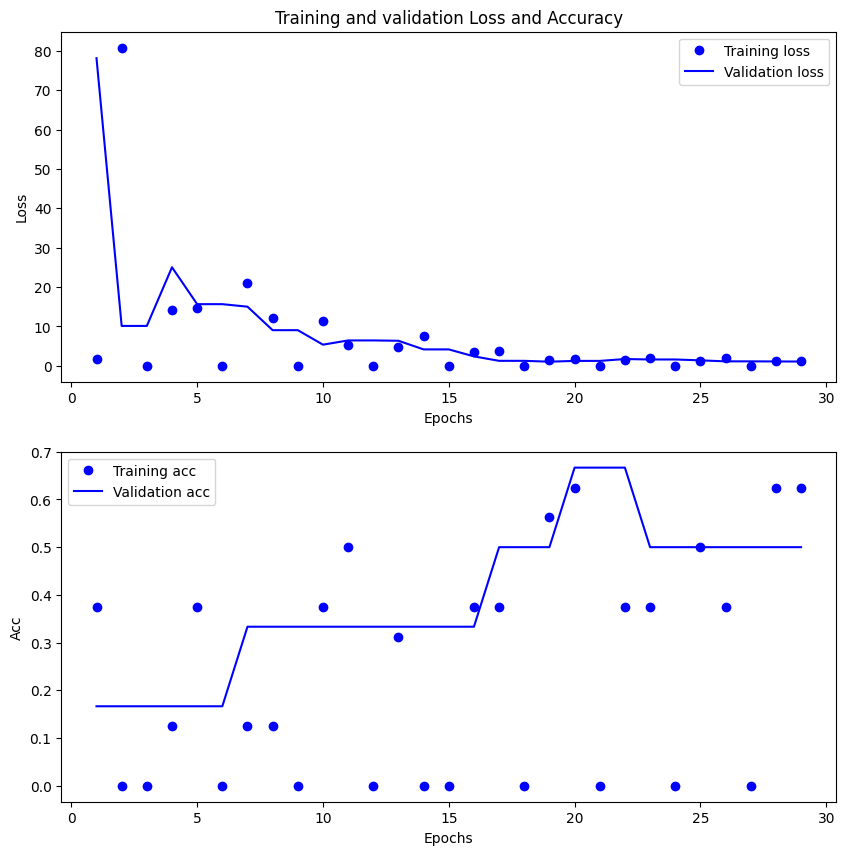

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

## Evaluating the model

In [12]:
import tensorflow as tf

model = tf.keras.models.load_model('model.keras')

score = model.evaluate(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.5000 - loss: 1.0465
Val loss: 1.0465482473373413
Val accuracy: 0.5


In [14]:
import tensorflow.keras as keras

model = keras.models.load_model("model.keras")

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 248, 248, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 20)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 40)   │         7,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 595360)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    59,536,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,633,520 (681.43 MB)

 Trainable params: 59,544,506 (227.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 119,089,014 (454.29 MB)

None
